# `1.  Simple Linear Regression`

`i. Lab Title:`
*   Simple Linear Regression – Employee Salary Prediction

`ii. Lab Obective:`
*   Understand and apply Simple Linear Regression
*   Load and explore a dataset
*   Train a salary prediction model based on years of experience
*   Visualize results
*   Evaluate model performance using MSE, MAE, and R² Score

`iii. Problem Description:`
*   A company wants to predict an employee’s salary based on their years of experience.
Using a dataset of 100 employees, build a simple linear regression model to predict salary.

iv. Dataset Description
*  The dataset contains two columns:
| Column         | Description                                       |
| -------------- | ------------------------------------------------- |
| **Experience** | Number of years of work experience (1–20 years)   |
| **Salary**     | Annual salary in USD (approx. $30,000 – $120,000) |

`v. Steps / Procedure`

`Step-1:Import Requered Labraries`

In [36]:
import pandas as pd

 Note.   `import pandas as pd`
* `**pandas**` is a Python library used for working with data tables
*   We give it a short name (pd) so it's easier to use.
*   `**What it does:**`
*   Load datasets (CSV, Excel)
*   Clean, filter, and modify data
*   Perform analysis

`Step-2: Load/Import Dataset `

In [37]:
emp_data=pd.read_csv("employee_salary_100.csv")

`Step-3: Explore the Dataset/Dataset Discription`

In [3]:
#Display all dataset
emp_data

,Experience,Salary
0,8.116262,62900.28437
1,19.063572,104759.25050
2,14.907885,90090.34346
3,12.374511,69560.20023
4,3.964354,44759.05723
...,...,...
95,10.382116,67449.41390
96,10.931924,73342.18649
97,9.123279,68198.87727
98,1.482963,37315.30763


In [4]:
#Display the head of dataset
emp_data.head()

,Experience,Salary
0,8.116262,62900.28437
1,19.063572,104759.25050
2,14.907885,90090.34346
3,12.374511,69560.20023
4,3.964354,44759.05723


In [6]:
#Display the tail of dataset
emp_data.tail()

,Experience,Salary
95,10.382116,67449.41390
96,10.931924,73342.18649
97,9.123279,68198.87727
98,1.482963,37315.30763
99,3.049937,46335.66470


In [38]:
#Checking the shape of a dataset
emp_data.shape

(100, 2)

In [6]:
#Checking Dataset Information
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Experience  100 non-null    float64
 1   Salary      100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [39]:
#Checking Dataset Information
emp_data.isnull().count()

,0
Experience,100
Salary,100


In [40]:
#Discribe dataset
emp_data.describe()

,Experience,Salary
count,100.000000,100.000000
mean,9.933434,69728.334695
std,5.652299,22384.981123
min,1.104920,32840.152790
25%,4.670814,50650.954752
50%,9.818707,66982.664100
75%,14.873859,89722.905170
max,19.750852,112912.521500


In [41]:
#Checking missing data
emp_data.isnull().sum()

,0
Experience,0
Salary,0


`Step-4: Split of the dataset into independent and dependent variables`

In [42]:
#Step1:Splitting of the dataset into independent and dependent variables
#Now let first define X and Y values
x=emp_data.iloc[:,:-1].values
y=emp_data.iloc[:,1].values
#: → all rows
#1 → select column at index 1 (2nd column)
#.values → convert to array

`Note: Independent Variable X`
*   `x = emp_data.iloc[:, :-1].values`
*   emp_data → your dataset (DataFrame)
*   .iloc → used to select rows and columns by index position
*   : → select all rows
*   :-1 → select all columns except the last one
*   .values → convert it into a NumPy array
*   `Aim: To selects the input features (e.g. Experience).`

`Note:  Dependent Variable Y`
*   `y = emp_data.iloc[:, 1].values`
*   : → all rows
*   1 → select column at index 1 (2nd column)
*   .values → convert to array
*   `Aim: To selects the target/output we want to predict → Salary`

In [43]:
#Now X=independent variable
x

array([[ 8.11626226],
       [19.06357182],
       [14.90788489],
       [12.3745112 ],
       [ 3.96435417],
       [ 3.96389589],
       [ 2.10358863],
       [17.45734677],
       [12.42118522],
       [14.45337898],
       [ 1.39110539],
       [19.42828719],
       [16.81641018],
       [ 5.0344431 ],
       [ 4.45467438],
       [ 4.48468569],
       [ 6.78060262],
       [10.9703722 ],
       [ 9.20695535],
       [ 6.53335366],
       [12.625205  ],
       [ 3.65038335],
       [ 6.55074832],
       [ 7.96087502],
       [ 9.6653297 ],
       [15.91834327],
       [ 4.79380186],
       [10.77045433],
       [12.25587681],
       [ 1.88255784],
       [12.54335219],
       [ 4.23995835],
       [ 2.23598027],
       [19.02882521],
       [19.34700863],
       [16.35954961],
       [ 6.78766161],
       [ 2.85577017],
       [14.0004275 ],
       [ 9.36289738],
       [ 3.31872646],
       [10.40836129],
       [ 1.6533819 ],
       [18.27708764],
       [ 5.91681965],
       [13

In [44]:
#Now Y=Dependent variable
y

array([ 62900.28437, 104759.2505 ,  90090.34346,  69560.20023,
        44759.05723,  47641.1464 ,  45803.82475,  97238.03599,
        75642.27288,  85304.73069,  40141.43215, 109356.9043 ,
        94616.83968,  52704.10958,  48304.08525,  52781.9677 ,
        53612.145  ,  72243.17807,  64867.28065,  48815.83991,
        81981.42138,  45906.80977,  56228.56057,  60670.56442,
        61584.46509,  91570.14645,  47461.63486,  69070.43097,
        78217.07868,  39550.48565,  89604.33825,  47832.72246,
        40231.67302, 105743.0713 ,  97794.17844,  95305.62908,
        57451.79751,  53739.29123,  85039.90519,  68959.32624,
        43101.347  ,  65790.05498,  42327.64168, 106868.0157 ,
        57622.43834,  79804.75634,  64704.01334,  66515.9143 ,
        78484.2667 ,  59001.21675, 102735.7501 ,  90078.60593,
       105900.1764 ,  99489.50036,  71687.08123, 104405.2567 ,
        35413.91159,  51262.6597 ,  32840.15279,  66474.77716,
        59623.20755,  53012.21883, 101051.6368 ,  54958

`Step 4: Visualize the Data`

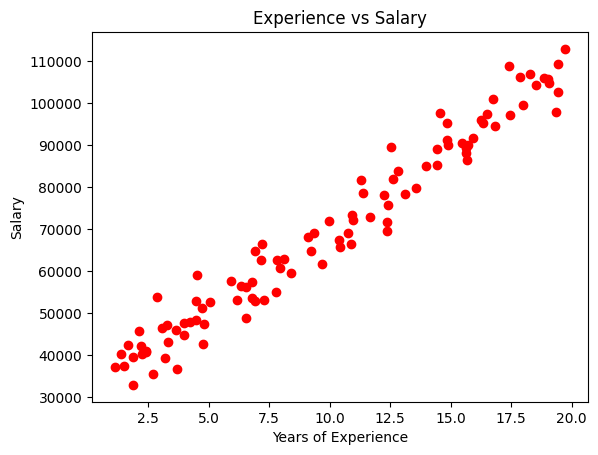

In [45]:
#Step 2: Plotting Scatter plot to check the relationship between the independent variable and the dependent variable
#import libraries for scatter plot
import matplotlib.pyplot as plt
plt.scatter(x, y, color="red")
#plt.scatter(emp_data["Experience"], emp_data["Salary"])
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary")
plt.show()

`Note:. import matplotlib.pyplot as plt`
*   `What is matplotlib?`
*   It is a plotting/graphing library.
*   `Why pyplot?`
*   pyplot has functions to create charts easily.
*   It contains simple functions for creating plots, such as:
*   plt.plot()
*   plt.scatter()
*   plt.bar()
*   plt.show()
*   `Used for:`
*   Plotting a line graph
*   Visualization of model results
*   Used to show trends over time or continuous data.
*   Example: Experience vs Salary.
*   Drawing scatter plots
*   Used to show how two variables relate.
*   Example: Experience (x) and Salary (y) points.
*   Visualization of model results
*   After training a machine learning model, we use plots to see:
*   How well the line fits the data
*   Whether predictions match real values
* ` Example:`
*   plt.scatter(x, y)
*   plt.show()

Note: We can observe that the independent and dependent variable is linearly related to each other

Step-5: Spliting the dataset into training and test split

In [46]:
#Splitting the dataset for the training set and testing set
#Now let's split the dataset into training and testing ( 70,30)
#first, we need to input the library for this process
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=0)

In [47]:
#Now let's see the value together
x_train,x_test,y_train,y_test

(array([[ 8.3848685 ],
        [17.39896509],
        [ 3.27229067],
        [ 2.41646223],
        [15.72752364],
        [10.77045433],
        [ 9.20695535],
        [ 2.68135754],
        [ 7.77831321],
        [14.43028953],
        [19.06357182],
        [ 6.1556316 ],
        [ 1.6533819 ],
        [10.40836129],
        [ 3.96435417],
        [ 4.48468569],
        [10.9703722 ],
        [ 3.31872646],
        [14.0004275 ],
        [ 3.96389589],
        [14.55165096],
        [ 7.18127629],
        [ 8.11626226],
        [19.34700863],
        [12.25587681],
        [19.42210793],
        [19.42828719],
        [16.35954961],
        [ 7.96087502],
        [18.85047989],
        [ 1.39110539],
        [ 4.23995835],
        [ 3.67756027],
        [ 4.72367439],
        [ 3.20151213],
        [ 7.17848312],
        [ 2.23598027],
        [ 6.90866411],
        [ 4.45467438],
        [ 9.97208358],
        [ 6.53335366],
        [ 1.88255784],
        [ 4.51223466],
        [ 9

`Step6: Model training/Working with regression`

In [48]:
#first we need to input the library for regression
from sklearn.linear_model import LinearRegression
#let make a function for regression as reg
reg=LinearRegression()
#lets fit the model with our split dataset.
#first we try for train and then for test and compare.
reg.fit(x_train,y_train)

LinearRegression()

`Step 7:Predicting results`

In [49]:
#Now let's predict,
y_predict=reg.predict(x_test)
y_predict

array([ 50121.90466169,  88957.6811521 ,  89132.66693702, 103047.92989783,
        88913.78302646,  76621.79315749,  57785.14133075,  95249.53143912,
        79305.67164819,  71676.44466743, 101065.81523979,  91242.60586152,
        61758.87681347,  51050.07563462,  98966.12895681,  80012.49036862,
        56898.57640979,  68911.74590582, 105027.43690414,  79541.28337824,
       102127.92979582,  96222.46100452,  79361.25824957,  50051.69083396,
        84041.47836843,  75554.265353  ,  39745.55433072,  43395.69004298,
        59738.59425256,  92011.01464118])

In [50]:
#Calculating Error/ Residue
residue = y_predict - y_test    # residue or error between actual and predicted salary
residue

array([ 2660.26980169, -6285.3662979 ,  -957.67652298, -1357.32680217,
       -2223.00279354,  3733.40696749,  4172.99633075, -2210.46049088,
        7618.59041819,  4227.03076743,  1576.31487979,   649.88275152,
        -949.88092653, -1654.03394538,  1728.09296681, -9591.84788138,
         670.01583979,  7327.28081582,  -715.63439586,  3899.01049824,
       -4740.08590418, -4829.17579548,  9801.05801957,  7551.58210396,
        4236.72202843, -2930.001347  , -6058.27041928, -2939.97465702,
        6546.86185256,  2794.59190118])

In [51]:
#now x_test
x_test

array([[ 4.79380186],
       [14.86251739],
       [14.90788489],
       [18.51561047],
       [14.85113619],
       [11.66426675],
       [ 6.78060262],
       [16.49376714],
       [12.3600996 ],
       [10.38211633],
       [18.00171966],
       [15.45491592],
       [ 7.81084884],
       [ 5.0344431 ],
       [17.45734677],
       [12.54335219],
       [ 6.55074832],
       [ 9.6653297 ],
       [19.02882521],
       [12.42118522],
       [18.27708764],
       [16.74601267],
       [12.3745112 ],
       [ 4.77559795],
       [13.5879234 ],
       [11.38749531],
       [ 2.10358863],
       [ 3.04993711],
       [ 7.28706247],
       [15.65413659]])

In [25]:
x_train

array([[ 8.3848685 ],
       [17.39896509],
       [ 3.27229067],
       [ 2.41646223],
       [15.72752364],
       [10.77045433],
       [ 9.20695535],
       [ 2.68135754],
       [ 7.77831321],
       [14.43028953],
       [19.06357182],
       [ 6.1556316 ],
       [ 1.6533819 ],
       [10.40836129],
       [ 3.96435417],
       [ 4.48468569],
       [10.9703722 ],
       [ 3.31872646],
       [14.0004275 ],
       [ 3.96389589],
       [14.55165096],
       [ 7.18127629],
       [ 8.11626226],
       [19.34700863],
       [12.25587681],
       [19.42210793],
       [19.42828719],
       [16.35954961],
       [ 7.96087502],
       [18.85047989],
       [ 1.39110539],
       [ 4.23995835],
       [ 3.67756027],
       [ 4.72367439],
       [ 3.20151213],
       [ 7.17848312],
       [ 2.23598027],
       [ 6.90866411],
       [ 4.45467438],
       [ 9.97208358],
       [ 6.53335366],
       [ 1.88255784],
       [ 4.51223466],
       [ 9.12327935],
       [ 1.48296341],
       [19

In [52]:
y_test

array([ 47461.63486,  95243.04745,  90090.34346, 104405.2567 ,
        91136.78582,  72888.38619,  53612.145  ,  97459.99193,
        71687.08123,  67449.4139 ,  99489.50036,  90592.72311,
        62708.75774,  52704.10958,  97238.03599,  89604.33825,
        56228.56057,  61584.46509, 105743.0713 ,  75642.27288,
       106868.0157 , 101051.6368 ,  69560.20023,  42500.10873,
        79804.75634,  78484.2667 ,  45803.82475,  46335.6647 ,
        53191.7324 ,  89216.42274])

In [27]:
y_train

array([ 59623.20755, 108924.7329 ,  47199.46349,  40965.26289,
        90078.60593,  69070.43097,  64867.28065,  35413.91159,
        54958.93125,  88973.62238, 104759.2505 ,  53012.21883,
        42327.64168,  65790.05498,  44759.05723,  52781.9677 ,
        72243.17807,  43101.347  ,  85039.90519,  47641.1464 ,
        97690.56874,  66474.77716,  62900.28437,  97794.17844,
        78217.07868, 102735.7501 , 109356.9043 ,  95305.62908,
        60670.56442, 105900.1764 ,  40141.43215,  47832.72246,
        36672.82493,  51262.6597 ,  39234.29143,  62649.35549,
        40231.67302,  52761.2481 ,  48304.08525,  71952.23895,
        48815.83991,  39550.48565,  59001.21675,  68198.87727,
        37315.30763, 112912.5215 ,  81981.42138,  88145.93353,
        37029.38873,  40788.66202,  91570.14645,  53739.29123,
        83739.82224,  64704.01334,  68959.32624,  81780.61609,
        32840.15279,  94616.83968, 106245.0491 ,  86505.84891,
        78350.95623,  57451.79751,  45906.80977,  42113

In [53]:
#Calculating Error/ Residue
residue = y_predict - y_test    # residue or error between actual and predicted salary
residue

array([ 2660.26980169, -6285.3662979 ,  -957.67652298, -1357.32680217,
       -2223.00279354,  3733.40696749,  4172.99633075, -2210.46049088,
        7618.59041819,  4227.03076743,  1576.31487979,   649.88275152,
        -949.88092653, -1654.03394538,  1728.09296681, -9591.84788138,
         670.01583979,  7327.28081582,  -715.63439586,  3899.01049824,
       -4740.08590418, -4829.17579548,  9801.05801957,  7551.58210396,
        4236.72202843, -2930.001347  , -6058.27041928, -2939.97465702,
        6546.86185256,  2794.59190118])

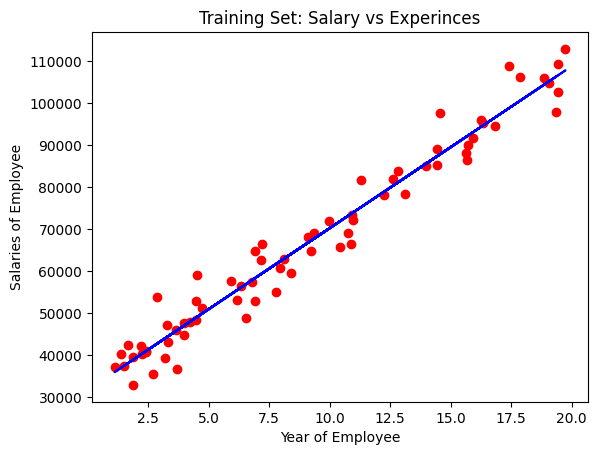

In [54]:
#Now lets Visualize the training set results. i.e display on  graph
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,reg.predict(x_train),color='blue')
plt.title("Training Set: Salary vs Experinces",size=12)
plt.xlabel("Year of Employee",size=10)
plt.ylabel("Salaries of Employee",size=10)
plt.show()

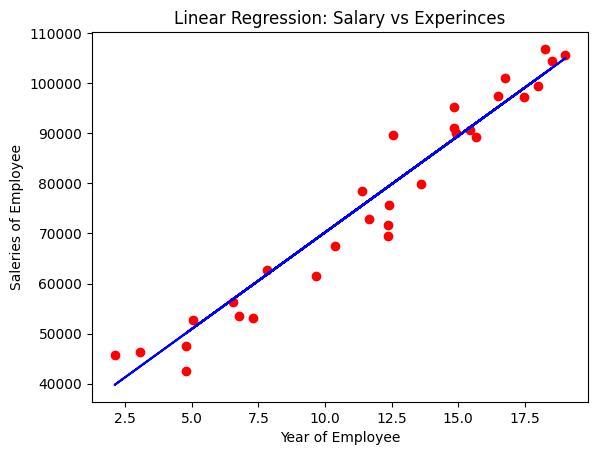

In [55]:
# Now lets Visualize the test set results. i.e display on  graph now lets predict for test
#copy the same code and change it
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,reg.predict(x_test),color='blue')
plt.title("Linear Regression: Salary vs Experinces",size=12)
plt.xlabel("Year of Employee",size=10)
plt.ylabel("Saleries of Employee",size=10)
plt.show()

In [56]:
#calcualting coefficient
print(reg.coef_)

[3857.07356401]


In [57]:
#calcualting intercept
print(reg.intercept_)

31631.858232544553


In [58]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,y_predict))
r2 = r2_score(y_test,y_predict) #built-in function r2_score() indicates R-squared value
print("RMSE =", rmse)
print("R2 Score=",r2)

RMSE = 4687.746609399123
R2 Score= 0.946529579140886


`Note. import numpy as np`
*   `What is numpy?`
*   numpy is a numerical computing library.
*   It handles arrays, math operations, and random numbers.
*   Example: arr = np.array([1, 2, 3])